In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# load and investigate the data:
data = pd.read_csv("tennis_stats.csv")
print(data.columns)
data.info()

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   17

<Axes: >

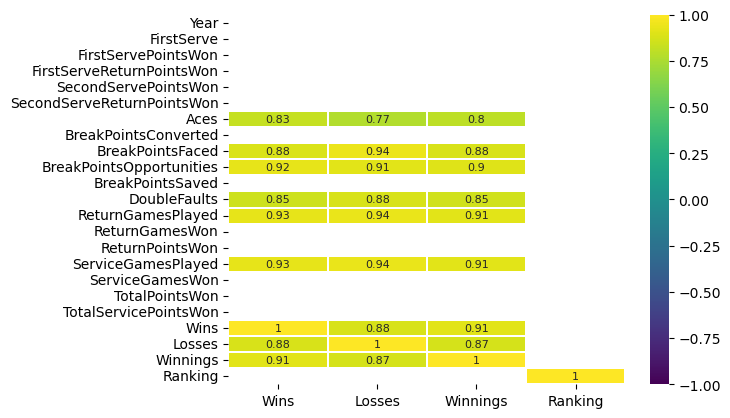

In [4]:
#Checking for correlations in numerical data
numeric_data = data.iloc[:,1:].copy()
corr = numeric_data.corr()
target_corr = corr[['Wins', 'Losses', 'Winnings','Ranking']].copy()
sns.heatmap(target_corr[(target_corr >= 0.5) | (target_corr <= -0.5)], 
            cmap='viridis', 
            vmax=1.0, 
            vmin=-1.0, 
            linewidths=0.1, 
            annot=True, 
            annot_kws={"size": 8}, 
            square=False)

From the above heatmap we can see the strongest correlations against the outcomes (Wins, Losses, Winnings) are "ServiceGamesPlayed", "ReturnGamesPlayed" and "BreakPointsOpportunities". Below are scatter plots showing the relationships between these 3 features and the continuous target variable "Winnings"

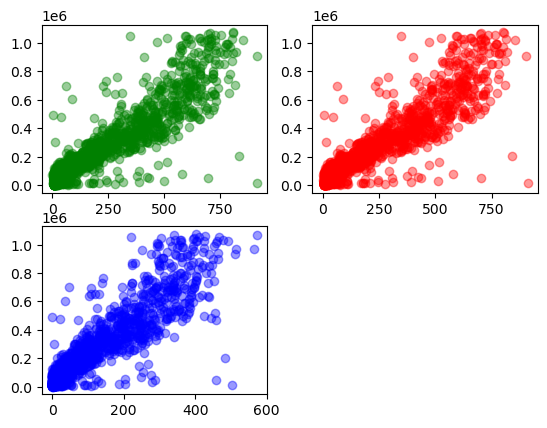

In [5]:
#Scatter plots of highly correlated predictors agains "Winnings" target
plt.subplot(2,2,1)
plt.scatter(data['ServiceGamesPlayed'],data['Winnings'],color = 'g', alpha=0.4)
plt.subplot(2,2,2)
plt.scatter(data['ReturnGamesPlayed'],data['Winnings'], color = 'r', alpha=0.4)
plt.subplot(2,2,3)
plt.scatter(data['BreakPointsOpportunities'],data['Winnings'], color = 'b', alpha=0.4)

In [6]:
#Regression model using 1 feature: "BreakPointsOpportunities"
X = data[['BreakPointsOpportunities']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.79281895849589


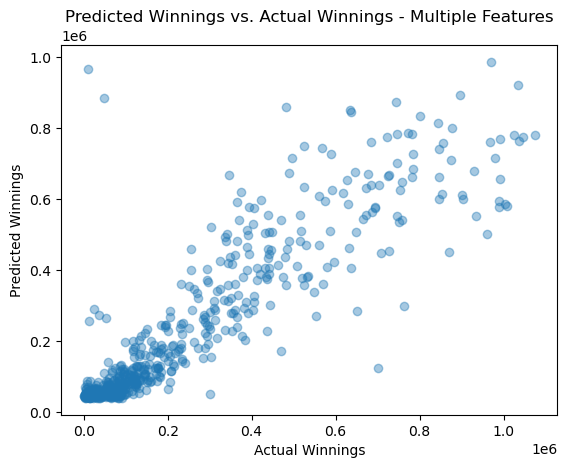

<Figure size 640x480 with 0 Axes>

In [7]:
#Plotting the models predicted values against the actual values.
y_pred = lm.predict(X_test)
plt.scatter(Y_test,y_pred, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

In [8]:
#More models using other single feature values
#Feature: Aces

X = data[['Aces']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.632977456052412


In [9]:
#More models using other single feature values
#Feature: ServiceGamesWon

X = data[['ServiceGamesWon']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.17295274862273957


In [10]:
#More models using other single feature values
#Feature: DoubleFaults

X = data[['DoubleFaults']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.7428698299779326


Out of "DoubleFaults", "ServiceGamesWon", "Aces", and "BreakPointsOpportunities", the predictor that performed the best was "BreakPointsOpportunities". This makes sense as this predictor had the highest correlation with the target.

In [11]:
#Models using double features: High correlated features
#Feature: 'DoubleFaults' & 'BreakPointsOpportunities'

X = data[['DoubleFaults','BreakPointsOpportunities']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.8062877348699797


In [12]:
#Models using double features: High correlated features
#Feature: 'ReturnGamesPlayed' & 'ServiceGamesPlayed'

X = data[['ReturnGamesPlayed','ServiceGamesPlayed']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.8248605391822305


Adding 2 features helps to explain more variance in the data, so we generally see 2 features perform better than 1 (as expected). Performance peaks with the use of 'ReturnGamesPlayed' & 'ServiceGamesPlayed'.

In [13]:
#Models using just the highest correlated features

X = data[['ServiceGamesPlayed', 'ReturnGamesPlayed',
       'BreakPointsOpportunities', 'BreakPointsFaced',
       'DoubleFaults', 'Aces']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.8316563787006849


In [14]:
#All features:
X = data[['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']].copy()
Y = data[['Winnings']].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

lm = LinearRegression()

lm.fit(X_train, Y_train)

print("R-squared: ",lm.score(X_test,Y_test))

R-squared:  0.8304977809137798


Comparing the multi-feature regression models above we see that we get a slightly better prediction from just selecting the top correlated features as opposed to selecting all features (minus Player and Year). In this way we can use less features (by selecting just the top correlated ones), save computing memory, and get the same predictive power.

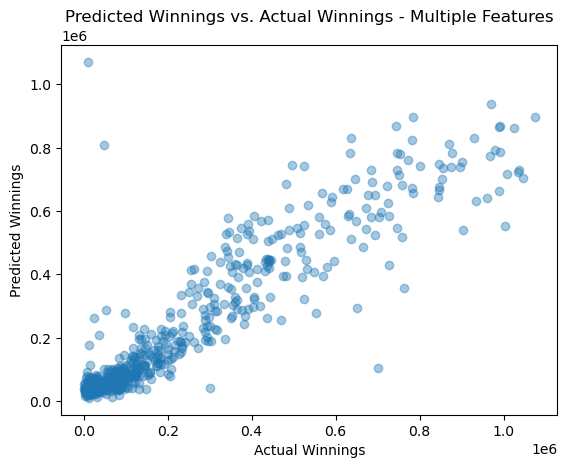

<Figure size 640x480 with 0 Axes>

In [15]:
# plot predictions against actual winnings
y_pred = lm.predict(X_test)
plt.scatter(Y_test,y_pred, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()